<a href="https://colab.research.google.com/github/asepmuhidin/MK-Data-Mining-UPB/blob/main/decisionTree_C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

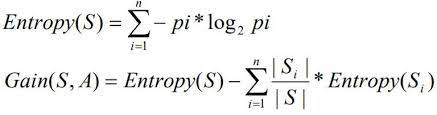

In [ ]:
import math

In [ ]:

def entropy(S,s1,s2):
  return -s1/S*math.log2(s1/S)+-s2/S*math.log2(s2/S) if (s1>0) & (s2>0)  else 0

def gain(En_S,Si,S):
  sum_si=0
  for e,s in Si.items():
    sum_si +=(s/S)*e

  return En_S-sum_si

In [ ]:
x={4:0,5:0.72,5:0.97}
sum_si=0
for s,e in x.items():
  sum_si +=s/10*e
print(sum_si)

0.485


In [ ]:
#Entropy- Gain Outlook
#Cloudy
Sc,sc_no,sc_yes=4,0,4
entro_c=entropy(Sc,sc_no,sc_yes)

#Rainy
Sr,sr_no,sr_yes=5,1,4
entro_r=entropy(Sr,sr_no,sr_yes)

#Sunny
Ss,ss_no,ss_yes=5,3,2
entro_s=entropy(Ss,ss_no,ss_yes)

print(f"Entropy Cloudy ={entro_c}, Raini={entro_r}, Sunny={entro_s}")

gain_outlook=gain(entro_total,{entro_c:Sc,entro_r:Sr,entro_s:Ss},S)
print(f"Gain Outlook ={gain_outlook}")


Entropy Cloudy =0, Raini=0.7219280948873623, Sunny=0.9709505944546686
Gain Outlook =0.2585210366587628


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import  accuracy_score, precision_score, recall_score

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/main/dataset/PlayTennis.csv")

In [ ]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [ ]:
#Label Encoding (Manual)
df['Outlook']=df['Outlook'].map({'Sunny' :0,'Overcast':1,'Rain':2})
df.head()


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,0,Hot,High,Weak,No
1,0,Hot,High,Strong,No
2,1,Hot,High,Weak,Yes
3,2,Mild,High,Weak,Yes
4,2,Cool,Normal,Weak,Yes


In [ ]:
#Label Encoding(Library sklearn)
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
columns=['Temperature','Humidity','Wind',	'Play Tennis']
df[columns]=df[columns].apply(lambda x :le.fit_transform(x))
df.head()


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,0,1,0,1,0
1,0,1,0,0,0
2,1,1,0,1,1
3,2,2,0,1,1
4,2,0,1,1,1


In [ ]:
#Split fiture->target
X=df.drop(columns='Play Tennis')
y=df['Play Tennis']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [ ]:
#Fit model
dc=tree.DecisionTreeClassifier(criterion='entropy')
dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred=dc.predict(x_test)

In [ ]:
#Evaluasi
accuracy=accuracy_score(y_test,y_pred)
presisi=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print(f"Akurasi model {accuracy*100}")
print(f"Presisi model {presisi*100}")
print(f"Recall model {recall*100}")


Akurasi model 66.66666666666666
Presisi model 100.0
Recall model 50.0


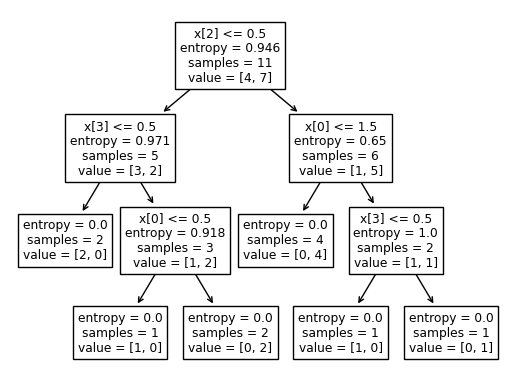

In [ ]:
tree.plot_tree(dc);